In [33]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import numpy as np


In [12]:
# Cargar CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [10]:
X.shape


(50000, 32, 32, 3)

## Ver formatos

In [14]:
# Ver formas de los datos
print("Forma de X_train:", X_train.shape)  # (50000, 32, 32, 3)
print("Forma de X_test:", X_test.shape)    # (10000, 32, 32, 3)
print("Número de clases:", len(set(y_train.flatten())))  # 10 clases

Forma de X_train: (50000, 32, 32, 3)
Forma de X_test: (10000, 32, 32, 3)
Número de clases: 10


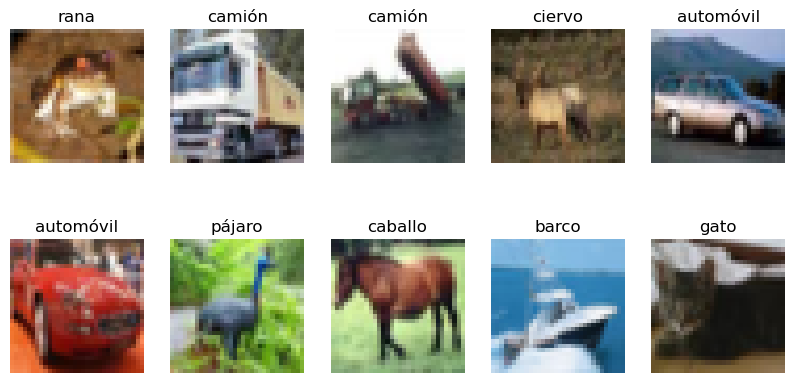

In [17]:
# Mostrar algunas imágenes del dataset
class_names = ['avión', 'automóvil', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

In [19]:
# Escalar imágenes entre 0 y 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Codificar etiquetas en formato one-hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


## Paso 4: Crear el modelo CNN

In [43]:
model = models.Sequential([
    # Primera capa convolucional
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # Segunda capa convolucional
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Tercera capa convolucional
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Aplanamiento
    layers.Flatten(),

    # Capas densas
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 categorías
])


## Paso 5: Compilar el modelo

In [45]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),  # Usar 20% de los datos de entrenamiento para validación
    epochs=10,             # Ajusta el número de épocas según tu máquina
    batch_size=32,         # Tamaño de los lotes
    verbose=1              # Mostrar progreso
)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.1969 - loss: 2.0751 - val_accuracy: 0.4655 - val_loss: 1.4559
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4429 - loss: 1.4980 - val_accuracy: 0.5718 - val_loss: 1.1718
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5417 - loss: 1.2730 - val_accuracy: 0.6346 - val_loss: 1.0430
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6016 - loss: 1.1349 - val_accuracy: 0.6431 - val_loss: 1.0237
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6282 - loss: 1.0630 - val_accuracy: 0.6748 - val_loss: 0.9478
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6577 - loss: 0.9853 - val_accuracy: 0.6779 - val_loss: 0.9294
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6795 - loss: 0.9360 - val_accuracy: 0.6900 - val_loss: 0.9004
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7040 - loss: 0

In [ ]:
import matplotlib.pyplot as plt

# Graficar la pérdida (train y test) a lo largo de las épocas
plt.plot(history.history['accuracy'], label='Pérdida de entrenamiento (Train)')
plt.plot(history.history['val_accuracy'], label='Pérdida de validación (Test)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (Loss)')
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.legend()
plt.grid()
plt.show()


In [35]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicciones en clases
y_test_classes = np.argmax(y_test, axis=1)  # Etiquetas reales en clases

# Generar el reporte de clasificación
report = classification_report(y_test_classes, y_pred_classes, target_names=class_names)
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

       avión       0.76      0.80      0.78      1000
   automóvil       0.86      0.85      0.86      1000
      pájaro       0.60      0.69      0.64      1000
        gato       0.60      0.51      0.55      1000
      ciervo       0.69      0.67      0.68      1000
       perro       0.64      0.66      0.65      1000
        rana       0.85      0.74      0.79      1000
     caballo       0.74      0.82      0.78      1000
       barco       0.85      0.85      0.85      1000
      camión       0.84      0.80      0.82      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000

